In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# VGG19

In [ ]:
import tensorflow as tf

model = tf.keras.applications.VGG19(include_top = False, weights = "imagenet")

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
len(model.layers)

22

# Loading And PreProcessing The Images

In [ ]:
content_image = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/OpenCV/Images/chaves.jpeg")

type(content_image),np.shape(content_image)

(PIL.JpegImagePlugin.JpegImageFile, (448, 598, 3))

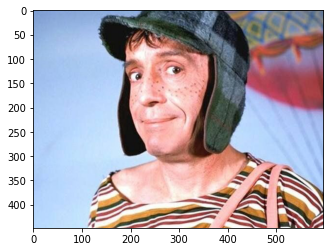

In [ ]:
plt.imshow(content_image)
plt.show()

In [ ]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

type(content_image), content_image.shape,content_image.max(),content_image.min()

(numpy.ndarray, (448, 598, 3), 255.0, 0.0)

In [ ]:
content_image = content_image / 255

content_image.max(),content_image.min(),content_image.shape

(1.0, 0.0, (448, 598, 3))

In [ ]:
content_image = content_image[tf.newaxis,:]

content_image.shape

(1, 448, 598, 3)

In [ ]:
content_image[0:4].shape

(1, 448, 598, 3)

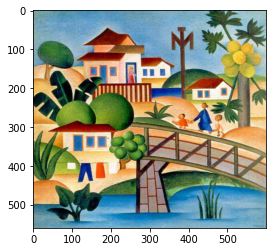

In [ ]:
style_image = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/OpenCV/Images/tarsila_amaral.jpg")

plt.imshow(style_image)
plt.show()

In [ ]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis , :]
style_image.shape

(1, 560, 600, 3)

# Building The Neural Network

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
content_layers = ["block4_conv2"]
style_layers = ["block1_conv1","block2_conv1", "block3_conv1","block4_conv1", "block5_conv1"]

In [ ]:
num_content_layers , num_style_layers = len(content_layers), len(style_layers)
num_content_layers, num_style_layers

(1, 5)

In [ ]:
[model.get_layer(name).output for name in style_layers]

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_6')>

In [ ]:
def vgg_layers(layer_name):

    vgg = tf.keras.applications.VGG19(include_top = False, weights = "imagenet")
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_name]
    new_model = tf.keras.models.Model(inputs = [vgg.input] ,outputs = outputs)

    return new_model

In [ ]:
style_extractor = vgg_layers(style_layers)

style_extractor.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
len(style_extractor.layers),len(model.layers)

(18, 22)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
style_outputs = style_extractor(style_image)
len(style_outputs)

5

In [ ]:
# style_outputs[0], style_outputs[1], style_outputs[2], style_outputs[3], style_outputs[4]
style_outputs[0].shape,style_outputs[1].shape,style_outputs[2].shape,style_outputs[3].shape,style_outputs[4].shape

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]),
 TensorShape([1, 35, 37, 512]))

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/einsum

layer_activation = style_outputs[0]
result = tf.linalg.einsum("bijc,bijd->bcd", layer_activation, layer_activation)
result.shape

TensorShape([1, 64, 64])

In [ ]:
result

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[212050.61 ,  97271.61 ,  95817.79 , ...,  35341.336,
         124171.28 , 151257.75 ],
        [ 97271.61 ,  81402.36 ,  61876.117, ...,  10589.602,
          65871.54 ,  72912.51 ],
        [ 95817.79 ,  61876.117,  56317.21 , ...,   9326.682,
          65209.88 ,  76263.91 ],
        ...,
        [ 35341.336,  10589.602,   9326.682, ...,  27760.312,
          23300.375,  22293.582],
        [124171.28 ,  65871.54 ,  65209.88 , ...,  23300.375,
          96408.   , 107057.81 ],
        [151257.75 ,  72912.51 ,  76263.91 , ...,  22293.582,
         107057.81 , 125952.09 ]]], dtype=float32)>

In [ ]:
shape = tf.shape(style_outputs[0])
num_loc = tf.cast(shape[1] * shape[2], tf.float32)
shape,num_loc,result.shape

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  1, 560, 600,  64], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=336000.0>,
 TensorShape([1, 64, 64]))

In [ ]:
def gram_matrix(layer_activation):

    result = tf.linalg.einsum("bijc,bijd->bcd", layer_activation, layer_activation)
    
    input_shape = tf.shape(layer_activation)

    num_locations = tf.cast(input_shape[1] * input_shape[2] , tf.float32)

    return result / num_locations

In [ ]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.631103  , 0.28949884, 0.285172  , ..., 0.10518255,
         0.36955738, 0.4501719 ],
        [0.28949884, 0.24226892, 0.1841551 , ..., 0.03151667,
         0.19604625, 0.21700151],
        [0.285172  , 0.1841551 , 0.16761075, ..., 0.02775798,
         0.19407701, 0.22697592],
        ...,
        [0.10518255, 0.03151667, 0.02775798, ..., 0.08261998,
         0.06934635, 0.06634995],
        [0.36955738, 0.19604625, 0.19407701, ..., 0.06934635,
         0.28692856, 0.31862444],
        [0.4501719 , 0.21700151, 0.22697592, ..., 0.06634995,
         0.31862444, 0.37485743]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):

    def __init__(self, style_layers, content_layers):
        super().__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.num_content_layers = len(content_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        
        inputs = inputs * 255
        # 0 - 1
        # -127.50 - 127.50
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs = outputs[:self.num_style_layers]
        content_outputs = outputs[self.num_style_layers :]

        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        content_dict = {content_name : value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name : value for style_name , value in zip(self.style_layers , style_outputs)}

        return {"content" : content_dict, "style" : style_dict}


In [ ]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

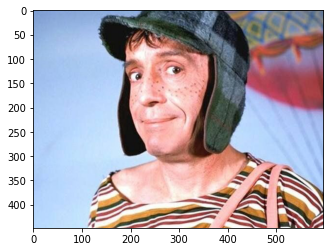

In [ ]:
plt.imshow(content_image[0]);

In [ ]:
content_image[0].max(),content_image[0].min()

(1.0, 0.0)

In [ ]:
results = extractor(content_image)
(results)

In [ ]:
for key, value in results.items():
    print(key, ":",value.keys())

content : dict_keys(['block4_conv2'])
style : dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets = extractor(style_image)["style"]

In [ ]:
content_targets = extractor(content_image)["content"]

In [ ]:
len(style_targets), len(content_layers)

(5, 1)

In [ ]:
new_image = tf.Variable(content_image)
new_image.shape

TensorShape([1, 448, 598, 3])

In [ ]:
content_weight = 1
style_weight = 1000

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate = 0.02)

# Traning

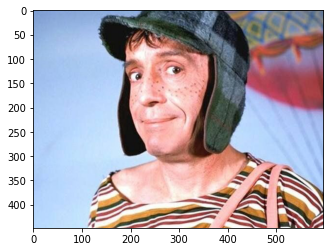

In [ ]:
plt.imshow(new_image[0]);

In [ ]:
expected_output = np.array([10000,15000])
predictions = np.array([8000,15900])

np.sum(abs(expected_output - predictions)) / 2

1450.0

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(expected_output, predictions)

1450.0

In [ ]:
np.mean((expected_output - predictions )**2) ,mean_squared_error(expected_output, predictions)

(2405000.0, 2405000.0)

Epoch 10 | content loss: 544609.625 | style loss: 586174208.0 | total loss 117235384320.0


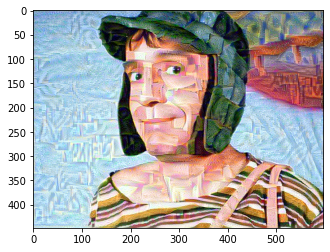

Epoch 20 | content loss: 549282.0625 | style loss: 530362816.0 | total loss 106073112576.0


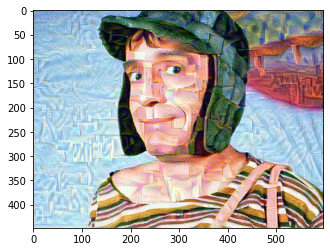

Epoch 30 | content loss: 553398.0 | style loss: 485437984.0 | total loss 97088159744.0


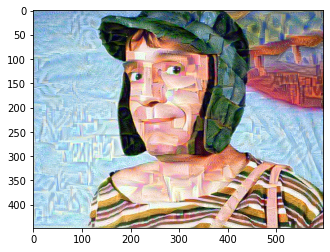

Epoch 40 | content loss: 557030.5 | style loss: 448205888.0 | total loss 89641730048.0


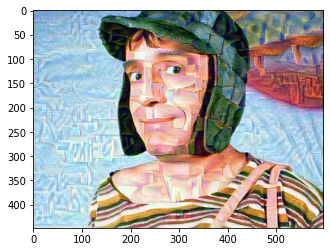

Epoch 50 | content loss: 560460.4375 | style loss: 416741184.0 | total loss 83348799488.0


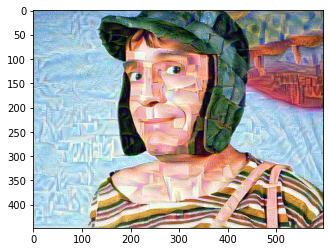

In [ ]:
epochs = 50
print_every = 10

content_weight = 1
style_weight = 1000

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

# Visualizing The Results

([], <a list of 0 Text major ticklabel objects>)

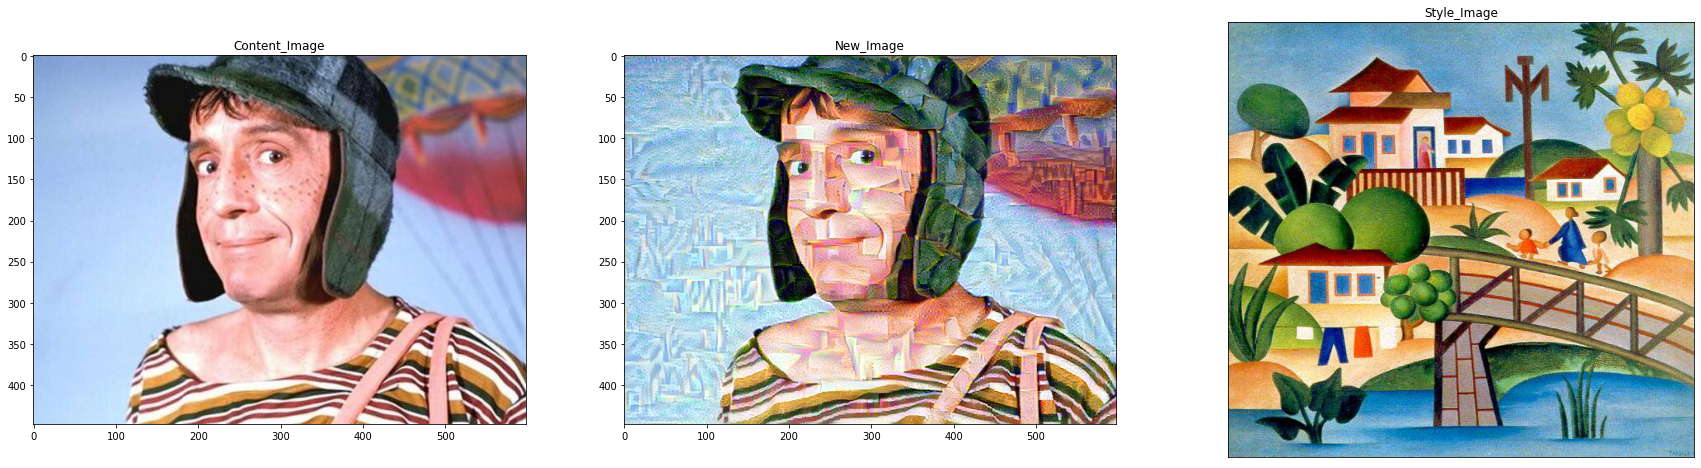

In [132]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (30,8))

ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title("Content_Image")
plt.xticks(())
plt.yticks(())

ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title("New_Image")
plt.xticks(())
plt.yticks(())

ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title("Style_Image")
plt.xticks(())
plt.yticks(())